In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original = pd.read_csv('food_all.csv')

In [9]:
cols = [a.split('.')[-1] for a in original.columns ]
food_cols = cols[:3]
nutrients_cols = cols[2:]

In [10]:
df = original.copy()
df.columns = cols

In [11]:
nutrientsDf = df[nutrients_cols]
foodDf = df[food_cols]

In [13]:
foodDf.head()
nutrientsDf.head()

,Nutrient Data Bank Number,Alpha Carotene,Ash,Beta Carotene,Beta Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Kilocalories,...,Potassium,Sodium,Zinc,Vitamin A - IU,Vitamin A - RAE,Vitamin B12,Vitamin B6,Vitamin C,Vitamin E,Vitamin K
0,1001,0,2.11,158,0,0.06,215,19,0.0,717,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,1002,0,2.11,158,0,0.06,219,19,0.0,717,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,1003,0,0.00,193,0,0.00,256,22,0.0,876,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,1004,0,5.11,74,0,2.34,75,15,0.0,353,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,1005,0,3.18,76,0,2.79,94,15,0.0,371,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [64]:
# ================================
# clustering k-means

In [69]:
X = nutrientsDf.iloc[:, 1:]
X.head()
from sklearn import preprocessing
X_t = X.select_dtypes("number")
X_t = preprocessing.normalize(X_t)
X_a = np.array(X_t)

In [70]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, init='k-means++', 
                 max_iter=300, 
                 tol=0.0001, verbose=0, random_state=0, 
                 copy_x=True, algorithm='elkan').fit(X_a)

In [71]:
outLabels = cluster.labels_

In [72]:
from sklearn.metrics import silhouette_score

silhouette_score(X_a, cluster.labels_, metric='euclidean')

0.29750231797294857

In [90]:
K = range(3,10)
fits = []
score = []
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k,init='k-means++', random_state = 0).fit(X_a)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_a, model.labels_, metric='euclidean'))

<AxesSubplot:>

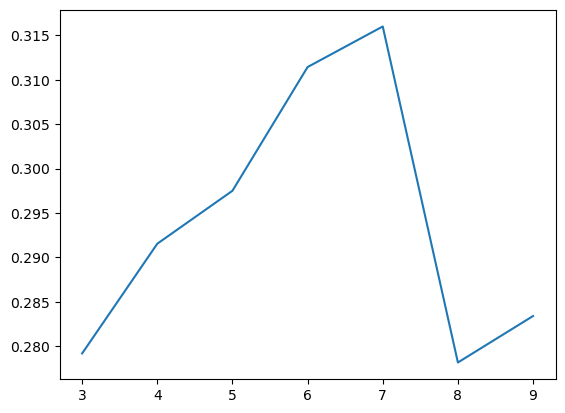

In [91]:
import seaborn as sns
sns.lineplot(x = K, y = score)

In [92]:
cluster = KMeans(n_clusters=8, init='k-means++', 
                 max_iter=300, 
                 tol=0.0001, verbose=0, random_state=0, 
                 copy_x=True, algorithm='elkan').fit(X_a)

In [100]:
cluster.labels_.shape

(7413,)

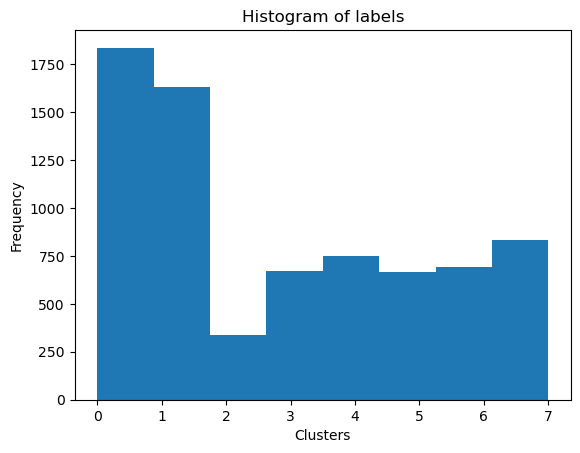

In [102]:
fig, ax = plt.subplots()
ax.hist(cluster.labels_, bins=8)
ax.set_title('Histogram of labels')
ax.set_xlabel('Clusters')
ax.set_ylabel('Frequency')
plt.show()